# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Diante desse modelo de negócio, o interessante é que o máximo possível de carros sejam vendidos pela plataforma. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um veículo usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço ideal de venda de um veículo ano 2005, com cerca de 172.095,3 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [182]:
# Inicializção das bibliotecas
%matplotlib inline

# importando o pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo
url = "/content/carros.csv"

# Lê e carrega o arquivo para a memória
df = pd.read_csv(url)

# Retorna um trecho com as 15 primeiras linhas do dataframe
print(df.head(15))

    Unnamed: 0  mileage_per_year  model_year      price sold
0            0             21801        2000   30941.02  yes
1            1              7843        1998   40557.96  yes
2            2              7109        2006   89627.50   no
3            3             26823        2015   95276.14   no
4            4              7935        2014  117384.68  yes
5            5             14661        2007   55405.26  yes
6            6              9990        2002   93415.61  yes
7            7             11599        2008   65265.09   no
8            8              7834        1999   43917.53  yes
9            9             14913        2003  107860.41  yes
10          10             14065        2016   75668.42   no
11          11             15095        2001   97411.70   no
12          12             16534        2009   91062.94   no
13          13             21998        2007   73156.01   no
14          14              7133        2005   82622.46  yes


In [183]:
#Verificando as informaçoes do dataset
print(df.info())
print()
print(df.groupby('sold').size())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10000 non-null  int64  
 1   mileage_per_year  10000 non-null  int64  
 2   model_year        10000 non-null  int64  
 3   price             10000 non-null  float64
 4   sold              10000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 390.8+ KB
None

sold
no     4200
yes    5800
dtype: int64


2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

In [184]:
#Criando o dicionario para tradução
traducao = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}

# Fazendo o rename das colunas com o dicionario
df = df.rename(columns=traducao)
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [185]:
# Fazendo a conversão das milhas para Km
df ['km_por_ano'] = df.milhas_por_ano * 1.60934
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,0,21801,2000,30941.02,yes,35085.22134
1,1,7843,1998,40557.96,yes,12622.05362
2,2,7109,2006,89627.50,no,11440.79806
3,3,26823,2015,95276.14,no,43167.32682
4,4,7935,2014,117384.68,yes,12770.11290


In [186]:
# Removendo as colunas que nao queremos
df = df.drop(columns = ["Unnamed: 0", "milhas_por_ano"])
df.head()

,ano_do_modelo,preco,vendido,km_por_ano
0,2000,30941.02,yes,35085.22134
1,1998,40557.96,yes,12622.05362
2,2006,89627.50,no,11440.79806
3,2015,95276.14,no,43167.32682
4,2014,117384.68,yes,12770.11290


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

In [187]:
!pip3 install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Nós queremos saber qual é o valor ideal para se vender um carro usado. Desta forma, precisamos das informações de carros que foram efetivamente vendidos! Vamos limpar o dataset com base nessa informação:

In [188]:
# Nós queremos saber qual é o valor ideal para se vender um carro usado. 
# Desta forma, precisamos das informações de carros que foram efetivamente 
# vendidos! Vamos limpar o dataset com base nessa informação:
# Vamos substituir os valores yes e no para 1 e 0
dict = {"yes" : 1, "no" : 0}
df = df.replace({"vendido": dict})
print(df.head())

   ano_do_modelo      preco  vendido   km_por_ano
0           2000   30941.02        1  35085.22134
1           1998   40557.96        1  12622.05362
2           2006   89627.50        0  11440.79806
3           2015   95276.14        0  43167.32682
4           2014  117384.68        1  12770.11290


In [189]:
# Agora vamos criar um novo dataframe apenas com os valores dos carros vendidos,
# que é o que nos interessa efetivamente
filtro  = df['vendido'] == 1
carros_vendidos = df[filtro]
carros_vendidos = carros_vendidos.drop(columns = "vendido")
print(carros_vendidos.head())

   ano_do_modelo      preco   km_por_ano
0           2000   30941.02  35085.22134
1           1998   40557.96  12622.05362
4           2014  117384.68  12770.11290
5           2007   55405.26  23594.53374
6           2002   93415.61  16077.30660


Agora vamos criar gráficos com esse novo dataframe e entender se existe alguma correlação

<AxesSubplot:>

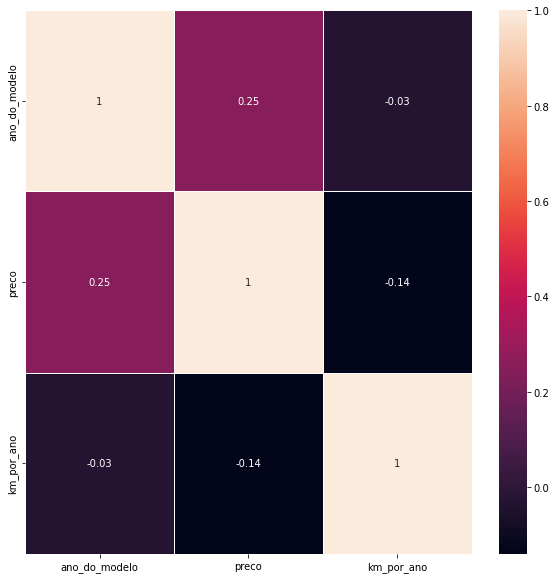

In [190]:
#Sua resposta aqui
import seaborn as sns
correlation_matrix = carros_vendidos.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

<AxesSubplot:xlabel='ano_do_modelo', ylabel='preco'>

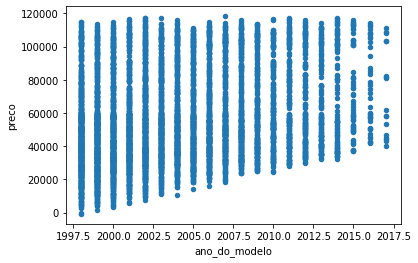

In [191]:
#Sua resposta aqui

carros_vendidos.plot.scatter('ano_do_modelo', 'preco')

<AxesSubplot:xlabel='km_por_ano', ylabel='preco'>

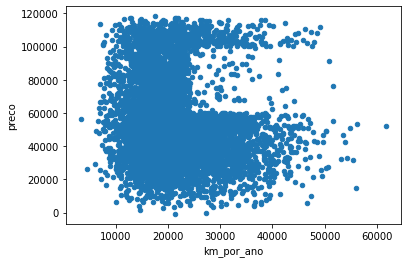

In [192]:
carros_vendidos.plot.scatter('km_por_ano', 'preco')

<AxesSubplot:xlabel='km_por_ano', ylabel='ano_do_modelo'>

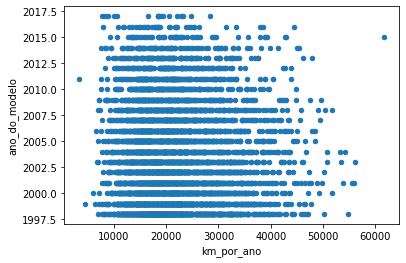

In [193]:
carros_vendidos.plot.scatter('km_por_ano','ano_do_modelo')

Esses gráficos nos mostram uma grande confusão. Novamente, como estamos interessados em um veículo de 2005, vamos tentar isolar essa variável

In [194]:
# Agora vamos criar um novo dataframe apenas com os valores dos carros vendidos,
# que é o que nos interessa efetivamente
filtro  = df['ano_do_modelo'] == 2005
carros_vendidos = df[filtro]
#carros_vendidos = carros_vendidos.drop(columns = "vendido")
print(carros_vendidos.head())

     ano_do_modelo     preco  vendido   km_por_ano
14            2005  82622.46        1  11479.42222
81            2005  90767.87        0  10333.57214
91            2005  77816.76        0  15285.51132
108           2005  79957.38        1  18890.43292
113           2005  35738.06        1  18309.46118


<AxesSubplot:xlabel='km_por_ano', ylabel='preco'>

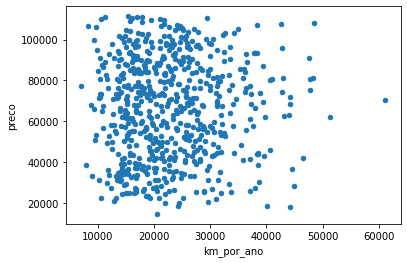

In [195]:
carros_vendidos.plot.scatter('km_por_ano', 'preco')


## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Resposta: Modelo de aprendizagem supervisionado, pois temos um database no qual se basear.

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta: A técnica da Regressão pois queremos um valor numérico como resposta.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: Regressão Linear

Algoritmo 2: Regressão Polinomial

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [196]:
!pip3 install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [197]:
#Sua resposta aqui
entradas = carros_vendidos[['km_por_ano']]
saidas = carros_vendidos['preco']
print(f"Formato das tabelas de dados {entradas.shape} e classes {saidas.shape}")

Formato das tabelas de dados (618, 1) e classes (618,)


In [198]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste  = train_test_split(entradas, saidas, test_size=0.2,random_state=42)

print(f"Formato das tabelas de dados de treino {X_treino.shape} e teste {Y_treino.shape}")

#Primeiras linhas do dataframe 
print(X_treino.head())

print()

print(Y_treino.head())

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

Formato das tabelas de dados de treino (494, 1) e teste (494,)
       km_por_ano
8596  15573.58318
6000  17920.00090
2892  21859.66522
9483  29301.25338
3296  14736.72638

8596     54724.96
6000    111343.03
2892    107464.79
9483    100402.21
3296     50094.70
Name: preco, dtype: float64
(494, 1)
(124, 1)
(494,)
(124,)


7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [199]:
#Sua resposta aqui
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_treino, Y_treino)

LinearRegression()

In [200]:
#Agora que temos um modelo treinado, vamos testa-lo
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))

Predição usando regressão, retorna valores continuos: [67104.17362934 67905.18624297 66318.9641741  66438.36581519
 66620.18195048 66331.2555195  65696.09625493 66373.23764732
 66541.9642979  66729.52703624 66102.82804838 65752.92377395
 67444.97911561 65543.01313487 65863.54588261 65421.3767037
 65696.09625493 67295.72706425 67901.35517427 67073.84433548
 66373.39727518 66193.33704637 68764.94190997 67232.83368645
 65835.45137882 66046.00052936 67149.50794227 65938.73060581
 66371.64136869 66377.86685533 68165.53928658 65815.33826816
 65771.60023386 65796.02329681 66673.17840081 66586.50047151
 68589.98977275 66529.1940689  66700.15550956 66784.11976519
 67566.45591891 66859.62374411 66424.47819116 67196.59816168
 67440.66916333 65667.84212328 67448.012045   68114.13911488
 66516.26421205 66355.19969887 65576.37535812 67493.18673006
 65353.8541179  66023.97188434 65732.01252398 65942.56167451
 65887.96894556 66351.68788589 65901.377686   67313.28612911
 66322.47598707 67394.53671109 6

In [201]:
# vamos avaliar os parametros do nosso modelo
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else: 
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


(A) Intercepto:  64347.40044533885
(B) Inclinação:  [0.0991884]
Nossa equação é: Y_pred = 64347.4 + 0.1 * X_LSTAT


Text(0, 0.5, 'Valor Predito')

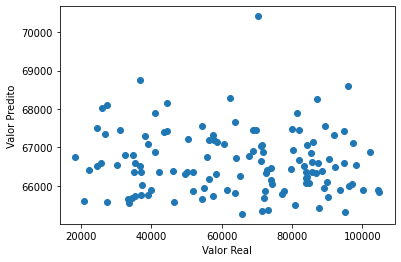

In [202]:

plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

In [203]:

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 68415774710 
Erro Quadrático Médio (MSE): 551740118.63
Erro Médio Absoluto (MAE): 20198.49
Raiz do Erro Quadrático Médio (RMSE): 23489.15 
R2-score: -800.46


7.2 - Algoritmo 2:  (0,5)

In [204]:
#Sua resposta aqui
#Sua resposta aqui
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

grau_poly = 2
polynomial_features= PolynomialFeatures(degree = grau_poly)
x_poly = polynomial_features.fit_transform(X_treino)

pol_model = LinearRegression()
pol_model.fit(x_poly, Y_treino)

LinearRegression()

In [205]:
#Agora que temos um modelo treinado, vamos testa-lo
y_poly_pred = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_poly_pred))

Predição usando regressão, retorna valores continuos: [67104.17362934 67905.18624297 66318.9641741  66438.36581519
 66620.18195048 66331.2555195  65696.09625493 66373.23764732
 66541.9642979  66729.52703624 66102.82804838 65752.92377395
 67444.97911561 65543.01313487 65863.54588261 65421.3767037
 65696.09625493 67295.72706425 67901.35517427 67073.84433548
 66373.39727518 66193.33704637 68764.94190997 67232.83368645
 65835.45137882 66046.00052936 67149.50794227 65938.73060581
 66371.64136869 66377.86685533 68165.53928658 65815.33826816
 65771.60023386 65796.02329681 66673.17840081 66586.50047151
 68589.98977275 66529.1940689  66700.15550956 66784.11976519
 67566.45591891 66859.62374411 66424.47819116 67196.59816168
 67440.66916333 65667.84212328 67448.012045   68114.13911488
 66516.26421205 66355.19969887 65576.37535812 67493.18673006
 65353.8541179  66023.97188434 65732.01252398 65942.56167451
 65887.96894556 66351.68788589 65901.377686   67313.28612911
 66322.47598707 67394.53671109 6

In [207]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_poly_pred)))
print("R2-score: %.2f" % r2_score(Y_teste,y_poly_pred) )

Soma dos Erros ao Quadrado (SSE): 68415774710 
Erro Quadrático Médio (MSE): 551740118.63
Erro Médio Absoluto (MAE): 20198.49
Raiz do Erro Quadrático Médio (RMSE): 23489.15 
R2-score: -0.02


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta:

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [208]:
#Sua resposta aqui
X_test = pd.DataFrame({'km_por_ano': [172095.3]})
preco = lin_model.predict(X_test)
print(f'O preço previsto para um veículo ano 2005 com 172095.3 km rodados é R${preco[0]:.2f}.')


O preço previsto para um veículo ano 2005 com 172095.3 km rodados é R$81417.26.


In [209]:
#Sua resposta aqui
X_test = pd.DataFrame({'km_por_ano': [172095.3]})
x_poly = polynomial_features.fit_transform(X_test)
preco = pol_model.predict(x_poly)
print(f'O preço previsto para um veículo ano 2005 com 172095.3 km rodados é R${preco[0]:.2f}.')

O preço previsto para um veículo ano 2005 com 172095.3 km rodados é R$164348.79.


In [217]:
from sklearn.linear_model import Ridge

# Crie o modelo de regressão Ridge com alpha=1
ridge_reg = Ridge(alpha=1)

# Treine o modelo com os dados de treino
ridge_reg.fit(X_treino, Y_treino)

# Faça a previsão do preço de venda para o veículo de interesse
preco_ridge = ridge_reg.predict(X_teste)

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((preco_ridge - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, preco_ridge))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, preco_ridge))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, preco_ridge)))
print("R2-score: %.2f" % r2_score(preco_ridge , Y_teste) )

X_test = pd.DataFrame({'km_por_ano': [172095.3]})
preco = ridge_reg.predict(X_test)
print(f'O preço previsto para um veículo ano 2005 com 172095.3 km rodados é R${preco[0]:.2f}.')

Soma dos Erros ao Quadrado (SSE): 68415774710 
Erro Quadrático Médio (MSE): 551740118.63
Erro Médio Absoluto (MAE): 20198.49
Raiz do Erro Quadrático Médio (RMSE): 23489.15 
R2-score: -800.46
O preço previsto para um veículo ano 2005 com 172095.3 km rodados é R$81417.26.


In [218]:
from sklearn.ensemble import GradientBoostingRegressor

# Crie o modelo de regressão Gradient Boosting com learning_rate=0.1 e n_estimators=100
gb_reg = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100)

# Treine o modelo com os dados de treino
gb_reg.fit(X_treino, Y_treino)

# Faça a previsão do preço de venda para o veículo de interesse
preco_gb = gb_reg.predict(X_teste)

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((preco_gb - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, preco_gb))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, preco_gb))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, preco_gb)))
print("R2-score: %.2f" % r2_score(preco_gb , Y_teste) )

X_test = pd.DataFrame({'km_por_ano': [172095.3]})
preco = gb_reg.predict(X_test)
print(f'O preço previsto para um veículo ano 2005 com 172095.3 km rodados é R${preco[0]:.2f}.')

Soma dos Erros ao Quadrado (SSE): 75887070693 
Erro Quadrático Médio (MSE): 611992505.59
Erro Médio Absoluto (MAE): 20141.06
Raiz do Erro Quadrático Médio (RMSE): 24738.48 
R2-score: -6.25
O preço previsto para um veículo ano 2005 com 172095.3 km rodados é R$64529.85.
